## Flight Data Analysis Project

This notebook aims to document the step-by-step process of our Flight Data Analysis project, focusing on data collection, cleaning, analysis, and machine learning applications to predict flight costs.

### Dataset Overview
We have two CSV files containing flight information scraped from various sources. The datasets include details such as:

- **Date**: The flight date.
- **Origin**: Departure airport code.
- **Destination**: Arrival airport code.
- **Departure Time**: Flight departure time.
- **Arrival Time**: Flight arrival time.
- **Stops**: Number of stops.
- **Stop Airport**: Airports where stops occur.
- **Duration**: Flight duration.
- **Company Name**: Airline(s) operating the flight.
- **Price**: Ticket price in GBP.
- **Seat Type**: Type of seat offered.

### Objectives
1. Combine the datasets into a single DataFrame.
2. Understand the structure and quality of the data.
3. Prepare the data for further exploratory data analysis (EDA) and machine learning tasks.

---

### Step 1: Load and Combine the Datasets
We'll begin by loading the two datasets and combining them into a single DataFrame. The separator used is `;`.


In [162]:
import pandas as pd

# Load the datasets
data1 = pd.read_csv("Data1.csv", sep=";")
data2 = pd.read_csv("Data2.csv", sep=";")

# Combine the datasets
combined_data = pd.concat([data1, data2], ignore_index=True)

# Display the first few rows of the combined dataset
combined_data.head()


,Date,Origin,Destination,Departure Time,Arrival Time,Stops,Stop Airport,Duration,Company Name,Price,Seat Type
0,2025-02-01,CDG,LHR,23:15,06:20+1,0 changes,NaN,8h 05m,FlixBus,£19,NaN
1,2025-02-01,CDG,LHR,09:55,11:57,1 change,LIL-LIL,3h 02m,"SNCF, Eurostar",£42,NaN
2,2025-02-01,CDG,LHR,16:20,16:45,direct,NaN,1h 25m,British Airways,£47,Basic Economy
3,2025-02-01,CDG,LHR,14:35,15:00,direct,NaN,1h 25m,British Airways,£55,Basic Economy
4,2025-02-01,CDG,LHR,16:10,16:35,direct,NaN,1h 25m,Air France,£74,Light


## Dataset Structure and Initial Observations

After combining the datasets, we will examine their structure to understand the data types, identify any missing values, and detect duplicate rows. This step will help us identify areas that need cleaning or preprocessing.

### Key Steps:
1. Display the shape of the dataset (number of rows and columns).
2. Examine the column data types and look for potential issues (e.g., inconsistent formats or unexpected types).
3. Check for missing values to identify columns requiring attention.
4. Identify duplicate rows that may need removal.


In [163]:
# Display the shape of the dataset
print(f"Dataset Shape: {combined_data.shape}")

# Display dataset information
combined_data.info()

# Check for missing values
missing_values = combined_data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = combined_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")


Dataset Shape: (44255, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44255 entries, 0 to 44254
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            44255 non-null  object
 1   Origin          44255 non-null  object
 2   Destination     44255 non-null  object
 3   Departure Time  44228 non-null  object
 4   Arrival Time    44228 non-null  object
 5   Stops           44228 non-null  object
 6   Stop Airport    38666 non-null  object
 7   Duration        44228 non-null  object
 8   Company Name    44222 non-null  object
 9   Price           44212 non-null  object
 10  Seat Type       43539 non-null  object
dtypes: object(11)
memory usage: 3.7+ MB

Missing Values per Column:
Date                 0
Origin               0
Destination          0
Departure Time      27
Arrival Time        27
Stops               27
Stop Airport      5589
Duration            27
Company Name        33
Price           

In [164]:
combined_data["Stops"].value_counts()

Stops
1 stop       20686
2 stops      14789
direct        5008
3 stops       3018
0 changes      542
1 change       181
2 changes        4
Name: count, dtype: int64

## Data Cleaning Steps

To prepare the dataset for analysis, the following cleaning steps will be performed:
1. **Remove Duplicate Rows**: Ensure no duplicate rows remain in the dataset to maintain data integrity.
2. **Transform `Stops` Column**: Convert textual values into integers:
   - `direct` and `0 changes` → `0`
   - `1 stop` and `1 change` → `1`
   - `2 stops` and `2 changes` → `2`
   - `3 stops` → `3`
3. **Clean `Price` Column**: Remove the `£` character and convert the values into integers for numerical analysis.
4. **Standardize `Arrival Time`**: Remove the `+x` suffix indicating a different time zone for easier time conversion.
5. **Convert `Departure Time` and `Arrival Time`**: Convert these columns into a proper time format.

These transformations will ensure consistent, clean, and usable data for further analysis and machine learning tasks.


In [165]:
import numpy as np

# Remove duplicate rows
cleaned_data = combined_data.drop_duplicates()

# Transform 'Stops' column
stops_mapping = {
    'direct': 0,
    '0 changes': 0,
    '1 stop': 1,
    '1 change': 1,
    '2 stops': 2,
    '2 changes': 2,
    '3 stops': 3
}
cleaned_data['Stops'] = cleaned_data['Stops'].map(stops_mapping)

# Clean 'Price' column
cleaned_data['Price'] = cleaned_data['Price'].str.replace('£', '').astype(float)

# Standardize 'Arrival Time' column by removing '+x'
cleaned_data['Arrival Time'] = cleaned_data['Arrival Time'].str.replace(r'\+\d+', '', regex=True)

# Convert 'Departure Time' and 'Arrival Time' columns to time format
cleaned_data['Departure Time'] = pd.to_datetime(cleaned_data['Departure Time'], format='%H:%M', errors='coerce').dt.time
cleaned_data['Arrival Time'] = pd.to_datetime(cleaned_data['Arrival Time'], format='%H:%M', errors='coerce').dt.time

# Display cleaned data info and preview
cleaned_data.info()
print("\nPreview of cleaned dataset:")
cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 37410 entries, 0 to 44251
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            37410 non-null  object 
 1   Origin          37410 non-null  object 
 2   Destination     37410 non-null  object 
 3   Departure Time  37405 non-null  object 
 4   Arrival Time    37405 non-null  object 
 5   Stops           37405 non-null  float64
 6   Stop Airport    32457 non-null  object 
 7   Duration        37405 non-null  object 
 8   Company Name    37399 non-null  object 
 9   Price           37389 non-null  float64
 10  Seat Type       36750 non-null  object 
dtypes: float64(2), object(9)
memory usage: 3.4+ MB

Preview of cleaned dataset:


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\368168779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Stops'] = cleaned_data['Stops'].map(stops_mapping)
C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\368168779.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Price'] = cleaned_data['Price'].str.replace('£', '').astype(float)
C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\368168779.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Date,Origin,Destination,Departure Time,Arrival Time,Stops,Stop Airport,Duration,Company Name,Price,Seat Type
0,2025-02-01,CDG,LHR,23:15:00,06:20:00,0.0,NaN,8h 05m,FlixBus,19.0,NaN
1,2025-02-01,CDG,LHR,09:55:00,11:57:00,1.0,LIL-LIL,3h 02m,"SNCF, Eurostar",42.0,NaN
2,2025-02-01,CDG,LHR,16:20:00,16:45:00,0.0,NaN,1h 25m,British Airways,47.0,Basic Economy
3,2025-02-01,CDG,LHR,14:35:00,15:00:00,0.0,NaN,1h 25m,British Airways,55.0,Basic Economy
4,2025-02-01,CDG,LHR,16:10:00,16:35:00,0.0,NaN,1h 25m,Air France,74.0,Light


In [166]:
cleaned_data["Seat Type"].value_counts()

Seat Type
Economy                18563
Standard                5476
Light                   3941
Economy Light           2247
Basic                   2153
                       ...  
Standard Economy           1
ECONOMY_SAVER              1
Economy Convenience        1
Go Smart                   1
Economy Superlight         1
Name: count, Length: 65, dtype: int64

In [167]:
# Temporarily set pandas to display all rows
with pd.option_context('display.max_rows', None):
    print(cleaned_data['Seat Type'].value_counts())

Seat Type
Economy                     18563
Standard                     5476
Light                        3941
Economy Light                2247
Basic                        2153
Basic Economy                 964
Discount                      742
Promotion                     514
Saver                         262
Event Fare                    257
Economy Saver                 153
UltraBasic                    148
Economy Classic               145
Eco Saver                     144
Economy Basic                 120
Eco Flex                      119
Go Light                       86
Elight                         82
Lite                           67
Ecolight                       66
PorterClassic Basic            54
Blue Basic                     36
SunLight                       29
Flexible                       28
Choice                         25
Optimal                        23
Economy Standard               21
Ecosaver                       20
Econo                          19
Ybas

## Grouping Seat Types

The dataset contains 65 different seat type labels, many of which are variations of the same underlying categories. To simplify and standardize the analysis, we have grouped the seat types into broader categories:

1. **Economy**: Includes variations like "Economy", "Economy Light", "Basic", "Standard", etc.
2. **Premium Economy**: Includes variations like "Premium Economy", "Flexible", and "Main Cabin".
3. **Business**: Includes variations like "Executive" and "Business".
4. **First Class**: Reserved for premium-tier seat types like "First Class".
5. **Other**: Any seat types not mapped to the above categories are classified as "Other".

This grouping allows us to:
- Better understand trends and patterns across general seat type categories.
- Create clearer and more interpretable visualizations.

The grouped seat types are stored in a new column: **`Seat Type (Grouped)`**.


In [168]:
# Expanded seat type mapping
seat_type_mapping = {
    # Economy variations
    'Economy': 'Economy',
    'Economy Light': 'Economy',
    'Economy Basic': 'Economy',
    'Economy Saver': 'Economy',
    'Economy Standard': 'Economy',
    'Economy Classic': 'Economy',
    'Economy Superlight': 'Economy',
    'Economy Flexible': 'Economy',
    'Basic': 'Economy',
    'Light': 'Economy',
    'Standard': 'Economy',
    'Saver': 'Economy',
    'Lite': 'Economy',
    'Discount': 'Economy',
    'UltraBasic': 'Economy',
    'Eco Saver': 'Economy',
    'Ecosaver': 'Economy',
    'Economy Value': 'Economy',
    'Go Light': 'Economy',
    'Ecolight': 'Economy',
    'Elight': 'Economy',
    'PorterClassic Basic': 'Economy',
    'Blue Basic': 'Economy',
    'SunLight': 'Economy',
    'Ybasic': 'Economy',
    'Economy Super Saver': 'Economy',
    'Event Fare': 'Economy',
    
    # Premium Economy variations
    'Premium Economy': 'Premium Economy',
    'Flexible': 'Premium Economy',
    'Main Cabin': 'Premium Economy',
    'Main Cabin Flex': 'Premium Economy',
    'Eco Flex': 'Premium Economy',
    'Eco Flex Plus': 'Premium Economy',
    'Premium': 'Premium Economy',
    'Comfort': 'Premium Economy',
    'Premium Economy Optima': 'Premium Economy',
    'Semi-Flexible': 'Premium Economy',
    'Choice': 'Premium Economy',
    'Optimal': 'Premium Economy',

    # Business variations
    'Business': 'Business',
    'Executive': 'Business',

    # First Class variations
    'First Class': 'First Class',

    # Other/Unclassified
    'Mixed': 'Other',
    'Other': 'Other',
    'Smart': 'Other',
    'Classic': 'Other',
    'Standard Economy': 'Other',
    'Ps': 'Other',
    'Ss': 'Other',
    'Qp': 'Other',
    'Q Deal': 'Other',
    'Go Smart': 'Other',
}


In [169]:

# Create a new column with grouped seat types
cleaned_data['Seat Type (Grouped)'] = cleaned_data['Seat Type'].map(
    lambda x: seat_type_mapping.get(x, 'Other')
)


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\2289555142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Seat Type (Grouped)'] = cleaned_data['Seat Type'].map(


## Final Cleanup

1. **Remove Empty Rows**: Drop rows where all columns are empty (`NaN`).
2. **Handle NaN Values**:
   - Keep `NaN` in the `Stop Airport` column where `Stops` is `0` since this is expected.
   - Drop rows with missing values in critical columns like `Price`, `Duration`, `Departure Time`, or `Arrival Time` if they cannot be imputed.
3. **Prepare for EDA**: Ensure the dataset is clean and complete for analyzing trends in flight data.


In [170]:
# Remove rows where all columns are NaN
cleaned_data = cleaned_data.dropna(how='all')

# Handle NaN values in critical columns
critical_columns = ['Price', 'Duration', 'Departure Time', 'Arrival Time', 'Stops','Seat Type']
cleaned_data = cleaned_data.dropna(subset=critical_columns)

# Leave Stop Airport as NaN where Stops = 0, ensure logical consistency
# No action needed for this, as it aligns with the data's logic

# Reset index after cleanup
cleaned_data.reset_index(drop=True, inplace=True)

# Display dataset information and preview
cleaned_data.info()
print("\nPreview of cleaned dataset:")
cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36750 entries, 0 to 36749
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 36750 non-null  object 
 1   Origin               36750 non-null  object 
 2   Destination          36750 non-null  object 
 3   Departure Time       36750 non-null  object 
 4   Arrival Time         36750 non-null  object 
 5   Stops                36750 non-null  float64
 6   Stop Airport         32289 non-null  object 
 7   Duration             36750 non-null  object 
 8   Company Name         36750 non-null  object 
 9   Price                36750 non-null  float64
 10  Seat Type            36750 non-null  object 
 11  Seat Type (Grouped)  36750 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.4+ MB

Preview of cleaned dataset:


,Date,Origin,Destination,Departure Time,Arrival Time,Stops,Stop Airport,Duration,Company Name,Price,Seat Type,Seat Type (Grouped)
0,2025-02-01,CDG,LHR,16:20:00,16:45:00,0.0,NaN,1h 25m,British Airways,47.0,Basic Economy,Other
1,2025-02-01,CDG,LHR,14:35:00,15:00:00,0.0,NaN,1h 25m,British Airways,55.0,Basic Economy,Other
2,2025-02-01,CDG,LHR,16:10:00,16:35:00,0.0,NaN,1h 25m,Air France,74.0,Light,Economy
3,2025-02-01,CDG,LHR,13:15:00,13:45:00,0.0,NaN,1h 30m,Air France,74.0,Light,Economy
4,2025-02-01,CDG,LHR,07:05:00,07:30:00,0.0,NaN,1h 25m,British Airways,76.0,Basic Economy,Other


In [171]:
cleaned_data.shape

(36750, 12)

## Exploratory Data Analysis (EDA)

The goal of this section is to explore the dataset to identify patterns and trends that can inform our machine learning models. Key areas of analysis include:

1. **Descriptive Statistics**:
   - Understand the basic distribution of numerical features (e.g., `Price`, `Duration`).
   - Analyze categorical features like `Company Name`, `Seat Type`, and `Stops`.

2. **Visualizing Trends**:
   - Explore the distribution of flight prices and durations.
   - Investigate how `Stops` influence ticket prices.
   - Identify which airlines are more cost-effective.
   - Examine trends in seat types and their impact on price.

3. **Correlation Analysis**:
   - Assess relationships between numerical variables to understand potential predictors for flight prices.


Descriptive Statistics for Numerical Columns:
              Stops         Price
count  36750.000000  36750.000000
mean       1.351510    356.375456
std        0.782527    293.902555
min        0.000000     13.000000
25%        1.000000    128.000000
50%        1.000000    348.000000
75%        2.000000    472.000000
max        3.000000   6802.000000


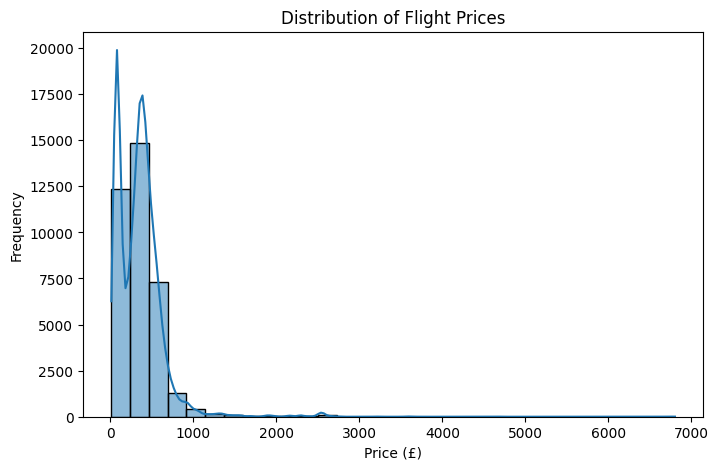

C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\2059649162.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stops', data=cleaned_data, palette='viridis')


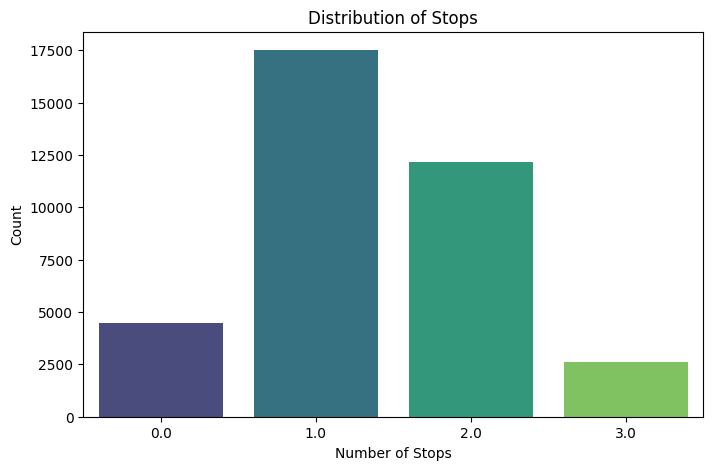

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(cleaned_data.describe())

# Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data['Price'], bins=30, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

# Distribution of Stops
plt.figure(figsize=(8, 5))
sns.countplot(x='Stops', data=cleaned_data, palette='viridis')
plt.title("Distribution of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.show()


## Observations on Flight Prices and Stops

1. **Distribution of Flight Prices**:
   - The majority of flight prices are concentrated in the lower range, specifically under £1000.
   - There is a sharp decline in frequency as prices increase, with only a few outliers exceeding £3000.

2. **Distribution of Stops**:
   - Flights with 1 stop are the most common, followed by those with 2 stops.
   - Direct flights (0 stops) are less frequent, and flights with 3 stops are the least common.

These trends highlight the dominance of 1-stop flights in the data and suggest that most flights are priced affordably, with only a small proportion of high-cost options.


## Analyzing Flight Duration

In this section, we will:
1. Visualize the distribution of flight durations to understand overall trends.
2. Examine how the number of stops affects flight duration, as flights with more stops are expected to have longer durations.


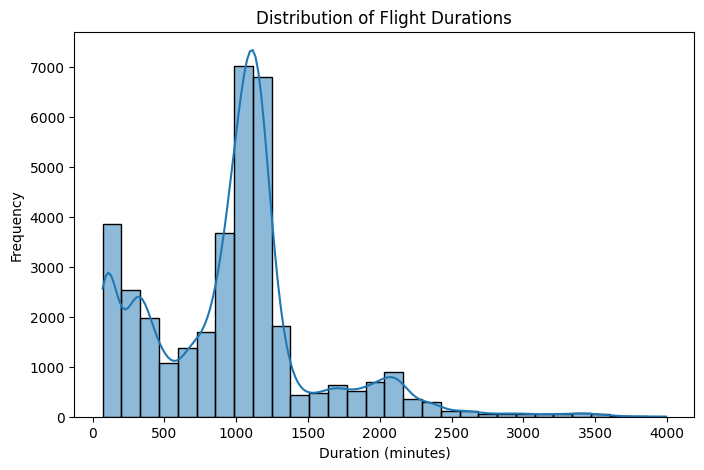

C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\2489026266.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stops', y='Duration (mins)', data=cleaned_data, palette='viridis')


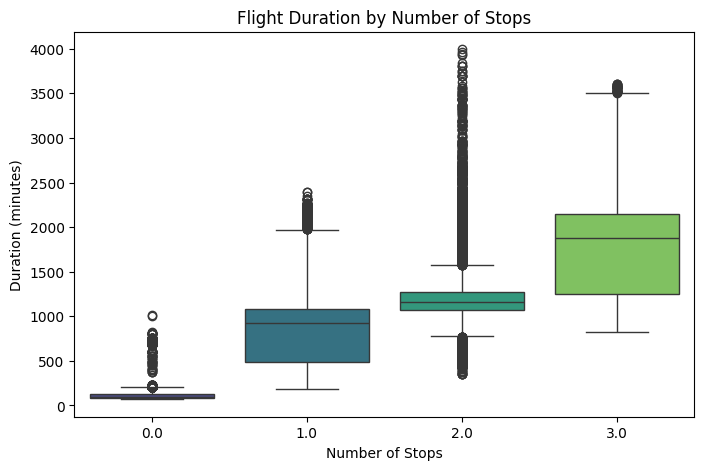

In [173]:
# Convert Duration to a consistent numerical format (minutes)
def duration_to_minutes(duration):
    if pd.isnull(duration):
        return np.nan
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip())
    return hours * 60 + minutes

cleaned_data['Duration (mins)'] = cleaned_data['Duration'].apply(duration_to_minutes)

# Distribution of Flight Durations
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data['Duration (mins)'], bins=30, kde=True)
plt.title("Distribution of Flight Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of Duration by Number of Stops
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stops', y='Duration (mins)', data=cleaned_data, palette='viridis')
plt.title("Flight Duration by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Duration (minutes)")
plt.show()


## Observations on Flight Durations

1. **Distribution of Flight Durations**:
   - The majority of flights have durations between 500 and 1500 minutes (approximately 8 to 25 hours), likely reflecting both short-haul and long-haul flights.
   - There is a noticeable peak in the distribution around 1000 minutes (~16 hours), potentially representing a common duration for popular flight routes.
   - A smaller number of flights have extremely short durations (<500 minutes) or extremely long durations (>2000 minutes), which could indicate direct short-haul flights and multi-stop or international long-haul flights.

2. **Impact of Stops on Flight Duration**:
   - **Direct Flights (0 stops)**: These flights consistently have the shortest durations, as expected, with most being well under 500 minutes.
   - **1-Stop Flights**: These flights show a wider range of durations, with some overlapping the durations of direct flights, likely due to short layovers.
   - **2-Stop and 3-Stop Flights**: The duration increases significantly with additional stops, as layover times contribute to the total flight time. Flights with 3 stops have the longest durations and also the most variability in their duration.

These findings confirm that the number of stops is a significant factor influencing flight duration, and both variables will likely contribute to predicting flight prices.


## Analyzing Airlines (Company Name)

In this section, we aim to:
1. Identify the most common airlines in the dataset.
2. Analyze the average ticket prices for each airline.
3. Visualize the distribution of ticket prices for popular airlines to identify trends or outliers.

This analysis will provide insights into how different airlines influence ticket prices and help identify any potential relationships between airlines and pricing strategies.


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3395105182.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")


Top 10 Airlines by Frequency:
Company Name
Multiple Airlines    3911
KLM                  1497
Air France           1357
Iberia               1225
Vueling               993
Lufthansa             919
Turkish Airlines      694
easyJet               646
British Airways       626
TAP AIR PORTUGAL      611
Name: count, dtype: int64

Top 10 Airlines by Average Price:
Company Name
TAP AIR PORTUGAL, ANA                  4744.100000
ITA Airways, ANA                       2622.333333
TAP AIR PORTUGAL, SWISS                1966.857143
TAP AIR PORTUGAL, Austrian Airlines    1957.000000
TAP AIR PORTUGAL, Lufthansa            1697.500000
easyJet, Qantas Airways                1676.000000
Vueling, Emirates                      1636.320000
ITA Airways, Lufthansa                 1495.176471
American Airlines                      1483.477273
British Airways, Emirates              1300.000000
Name: Price, dtype: float64


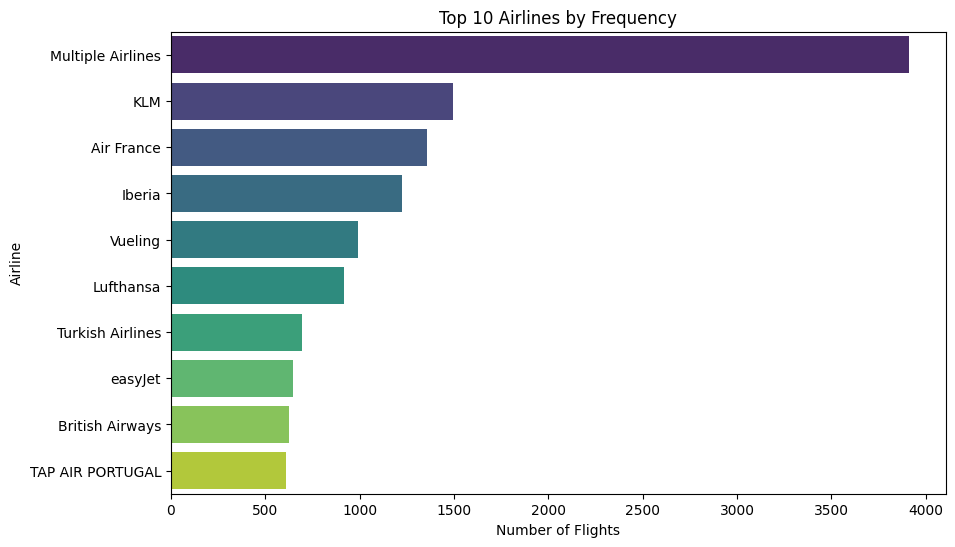

C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3395105182.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_airline.values, y=avg_price_by_airline.index, palette="viridis")


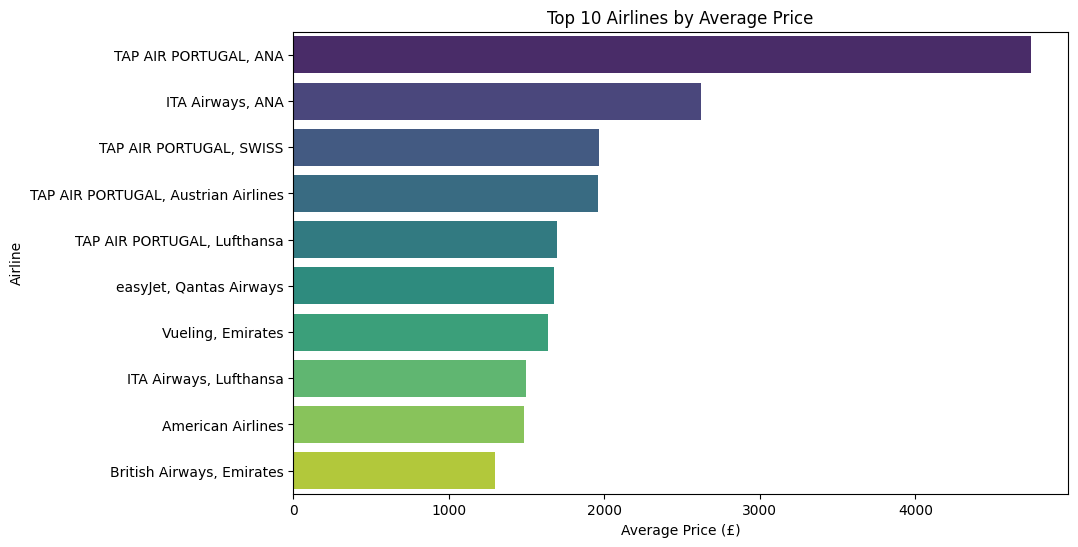

In [174]:
# Top 10 most frequent airlines
top_airlines = cleaned_data['Company Name'].value_counts().head(10)
print("Top 10 Airlines by Frequency:")
print(top_airlines)

# Average price by airline
avg_price_by_airline = (
    cleaned_data.groupby('Company Name')['Price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Airlines by Average Price:")
print(avg_price_by_airline)

# Plot top airlines by frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")
plt.title("Top 10 Airlines by Frequency")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

# Plot average ticket price for top airlines
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_airline.values, y=avg_price_by_airline.index, palette="viridis")
plt.title("Top 10 Airlines by Average Price")
plt.xlabel("Average Price (£)")
plt.ylabel("Airline")
plt.show()


## Observations on Airlines (Company Name)

1. **Top Airlines by Frequency**:
   - "Multiple Airlines" dominates the dataset, indicating a high number of flights with multiple carriers.
   - Popular single airlines include **KLM**, **Air France**, **Iberia**, and **Vueling**, each with significant coverage in the dataset.

2. **Understanding Flights with Multiple Airlines**:
   - When multiple airline names appear (e.g., **TAP AIR PORTUGAL, SWISS**), this corresponds to flights with **stops** where different airlines operate different segments of the journey.
   - Such cases are common for flights with at least one stop, as airlines often collaborate to cover routes that involve layovers or connecting flights.

3. **Top Airlines by Average Price**:
   - Flights involving combinations of premium airlines, such as **TAP AIR PORTUGAL, ANA**, and **ITA Airways, ANA**, have the highest average ticket prices (above £2000). These likely correspond to long-haul or multi-stop flights.
   - Budget airlines like **easyJet** and **Vueling** appear in the top 10 when paired with premium carriers (e.g., **easyJet, Qantas Airways** and **Vueling, Emirates**), which may indicate premium connections driving up ticket prices.
   - Single premium airlines (e.g., **British Airways**, **American Airlines**) also have consistently higher average ticket prices.

4. **Insights**:
   - Flights operated by multiple airlines (e.g., "Multiple Airlines") typically involve stops and may exhibit longer durations and higher prices due to inter-airline collaborations.
   - It would be beneficial to differentiate between single-carrier and multi-carrier flights during analysis to better understand pricing trends.



## Analyzing Seat Type

In this section, we will:
1. Identify the most common seat types in the dataset.
2. Analyze how ticket prices vary across different seat types.
3. Visualize the distribution of ticket prices for each seat type.

This analysis will highlight how different seating options influence pricing trends and identify any significant variations across seat classes.


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\4096882993.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_seat_type_counts.index, y=grouped_seat_type_counts.values, palette="viridis")


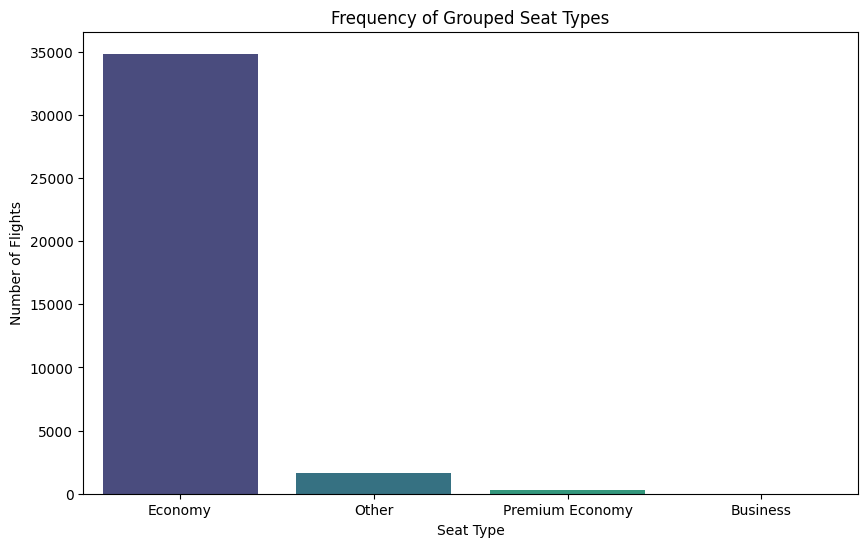

C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\4096882993.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_avg_price_by_seat_type.index, y=grouped_avg_price_by_seat_type.values, palette="viridis")


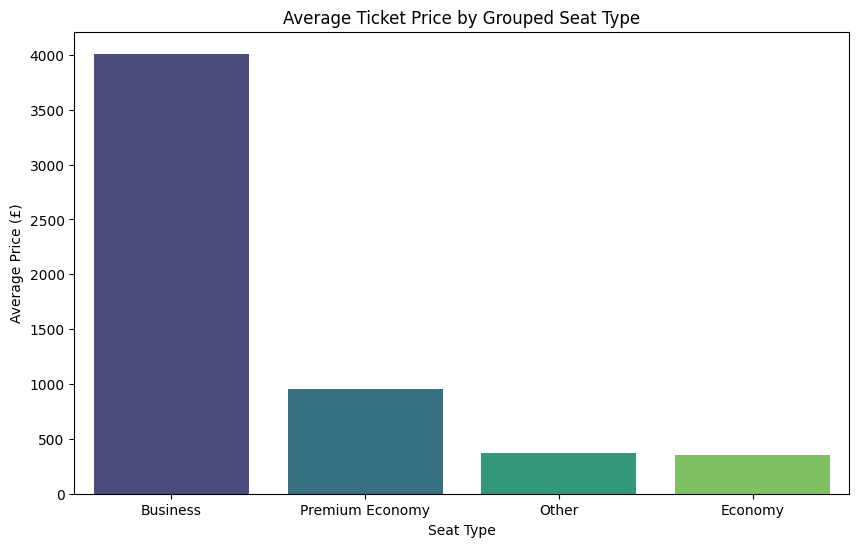

In [175]:
# calculate frequencies and average prices
grouped_seat_type_counts = cleaned_data['Seat Type (Grouped)'].value_counts()
grouped_avg_price_by_seat_type = (
    cleaned_data.groupby('Seat Type (Grouped)')['Price']
    .mean()
    .sort_values(ascending=False)
)

# Plot frequencies of grouped seat types
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_seat_type_counts.index, y=grouped_seat_type_counts.values, palette="viridis")
plt.title("Frequency of Grouped Seat Types")
plt.xlabel("Seat Type")
plt.ylabel("Number of Flights")
plt.show()

# Plot average prices by grouped seat types
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_avg_price_by_seat_type.index, y=grouped_avg_price_by_seat_type.values, palette="viridis")
plt.title("Average Ticket Price by Grouped Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Average Price (£)")
plt.show()

## Observations on Grouped Seat Types

1. **Frequency of Seat Types**:
   - **Economy** dominates the dataset, with the vast majority of flights falling into this category. This aligns with expectations, as economy class is the most widely available and affordable seat type.
   - **Premium Economy** and **Business** are much less frequent, indicating that these categories are available on fewer routes or less commonly chosen by travelers.
   - A notable portion of the dataset falls under the "Other" category, which includes seat types that could not be cleanly mapped to standard categories.

2. **Average Ticket Price by Seat Type**:
   - **Business Class** has the highest average ticket price, significantly outpacing all other categories, which aligns with its premium nature.
   - **Premium Economy** has an average price notably higher than Economy but still considerably lower than Business Class.
   - **Economy** has the lowest average ticket price, as expected, while the "Other" category shows a slightly higher average, likely due to mixed or specialized pricing for unique seat offerings.

3. **Insights**:
   - Economy flights dominate in both frequency and affordability, making them the most common choice for travelers.
   - The stark price differences between Economy, Premium Economy, and Business highlight the role of seat type as a critical factor influencing ticket prices.
   - Further analysis could explore whether seat type interacts with other factors, such as airline, stops, or duration, to influence ticket pricing.

These observations highlight the importance of seat type as a feature for predictive modeling in our project.


## Correlation Analysis

The goal of this section is to analyze relationships between key numerical features in the dataset, such as:
1. **Price**: The target variable for our project.
2. **Stops**: Number of stops for the flight.
3. **Duration (mins)**: Total flight duration in minutes.

### Objectives:
1. Identify the strength and direction of correlations between features.
2. Visualize these relationships using correlation heatmaps and scatter plots.
3. Highlight any patterns that suggest potential predictors for ticket prices.


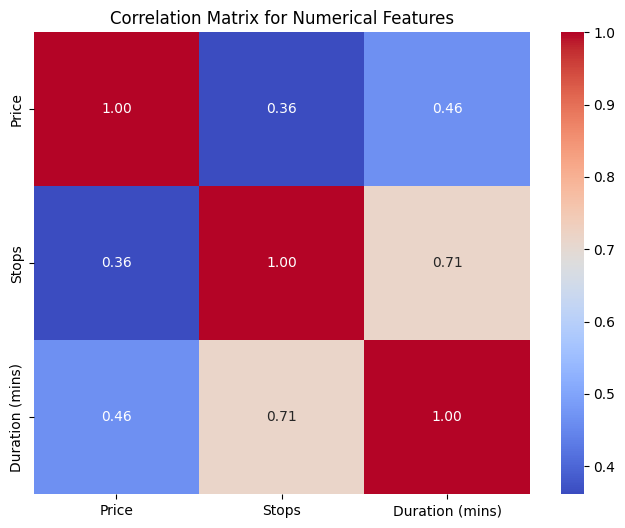

In [176]:
# Compute the correlation matrix for numerical features
correlation_matrix = cleaned_data[['Price', 'Stops', 'Duration (mins)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


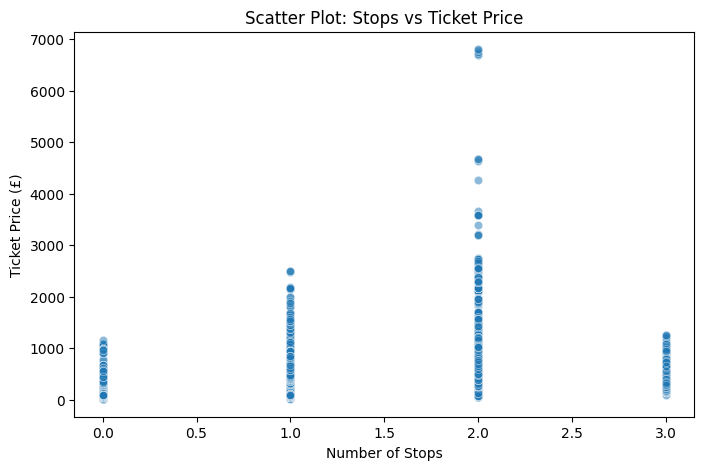

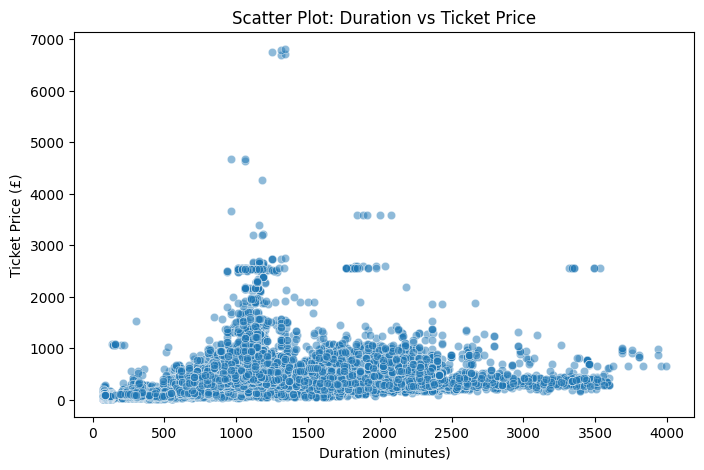

In [177]:
# Scatter plot: Stops vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Stops', y='Price', data=cleaned_data, alpha=0.5)
plt.title("Scatter Plot: Stops vs Ticket Price")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price (£)")
plt.show()

# Scatter plot: Duration vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration (mins)', y='Price', data=cleaned_data, alpha=0.5)
plt.title("Scatter Plot: Duration vs Ticket Price")
plt.xlabel("Duration (minutes)")
plt.ylabel("Ticket Price (£)")
plt.show()


## Observations from Correlation Analysis

1. **Correlation Matrix**:
   - **Price and Stops**:
     - A moderate positive correlation (0.36) exists between the number of stops and ticket prices, indicating that flights with more stops tend to be more expensive on average.
   - **Price and Duration**:
     - A stronger positive correlation (0.46) is observed between flight duration and ticket prices, suggesting that longer flights often come with higher ticket costs.
   - **Stops and Duration**:
     - A strong correlation (0.71) exists between the number of stops and the flight duration, reflecting the additional time incurred during layovers.

2. **Scatter Plot: Stops vs Price**:
   - Flights with 0 stops generally have lower ticket prices.
   - A wider range of prices is observed for flights with 1 or 2 stops, with outliers reaching over £6000, likely reflecting long-haul or multi-leg flights.
   - Flights with 3 stops exhibit a smaller price range but tend to have mid-range ticket prices.

3. **Scatter Plot: Duration vs Price**:
   - Short-duration flights (<500 minutes) typically have lower ticket prices.
   - Flights with durations between 500 and 1500 minutes show the widest variation in prices, including outliers exceeding £6000, potentially indicating long-haul or premium flights.
   - Extremely long flights (>2000 minutes) have a narrower price range, likely reflecting specialized routes or multi-stop itineraries.

4. **Insights**:
   - Both `Stops` and `Duration` are important predictors of ticket prices.
   - Additional stops and longer durations are often associated with higher costs, though there is variability due to factors such as airlines, seat types, and route demand.
   - Outliers in the dataset suggest premium routes or first-class options that significantly increase prices.

These observations highlight the importance of incorporating both `Stops` and `Duration` as key features in our predictive modeling.


## Machine Learning Workflow

The goal of this section is to build a machine learning model to predict flight prices based on various features in our dataset.

### Workflow:
1. **Data Preparation**:
   - Extract relevant features from the dataset.
   - Convert the `Date` column to a proper date type and engineer temporal features (e.g., day, month, weekday).
   - One-hot encode categorical features (`Company Name`, `Seat Type (Grouped)`, `Origin`, `Destination`).
   - Normalize/scale numerical features (`Stops`, `Duration (mins)`).
   - Split the dataset into training and testing sets.

2. **Model Training**:
   - Train multiple machine learning models:
     - **Random Forest Regressor**
     - **Gradient Boosting Machines (e.g., XGBoost)**
     - **Neural Networks** (if time permits)
   - Evaluate model performance using metrics like **MAE**, **RMSE**, and **R² Score**.

3. **Model Selection and Hyperparameter Tuning**:
   - Perform hyperparameter optimization to improve the selected model.

4. **Deployment**:
   - Integrate the best-performing model into a Streamlit app for predictions.

Let’s begin with **data preparation**!


In [178]:
cleaned_data.head()

,Date,Origin,Destination,Departure Time,Arrival Time,Stops,Stop Airport,Duration,Company Name,Price,Seat Type,Seat Type (Grouped),Duration (mins)
0,2025-02-01,CDG,LHR,16:20:00,16:45:00,0.0,NaN,1h 25m,British Airways,47.0,Basic Economy,Other,85
1,2025-02-01,CDG,LHR,14:35:00,15:00:00,0.0,NaN,1h 25m,British Airways,55.0,Basic Economy,Other,85
2,2025-02-01,CDG,LHR,16:10:00,16:35:00,0.0,NaN,1h 25m,Air France,74.0,Light,Economy,85
3,2025-02-01,CDG,LHR,13:15:00,13:45:00,0.0,NaN,1h 30m,Air France,74.0,Light,Economy,90
4,2025-02-01,CDG,LHR,07:05:00,07:30:00,0.0,NaN,1h 25m,British Airways,76.0,Basic Economy,Other,85


## Handling Multi-Carrier Flights in Data Preparation

The `Company Name` column contains multiple airline names separated by a comma for flights with stops operated by more than one carrier. To ensure proper handling of this feature, the following steps are performed:

1. **Multi-Carrier Indicator**:
   - A new binary feature (`Multi-Carrier`) is created to indicate whether a flight involves multiple airlines.

2. **Splitting Airlines**:
   - The `Company Name` column is split into individual airline names to handle flights with multiple carriers.

3. **One-Hot Encoding Airlines**:
   - Each unique airline is treated as a separate feature using one-hot encoding. If a flight involves multiple airlines, its row will have multiple airline features set to 1.

4. **Updating Features**:
   - The original `Company Name` column is dropped, and the new one-hot encoded airline features and the `Multi-Carrier` indicator are added to the dataset.
   - Other features like `Stops`, `Duration (mins)`, temporal features from the `Date` column, and categorical features (`Seat Type (Grouped)`, `Origin`, `Destination`) remain in the dataset.

This preprocessing ensures that the model accurately represents the complexity of multi-carrier flights and utilizes airline-specific information effectively.


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import joblib

# Ensure 'Date' is converted to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Add temporal features
cleaned_data['Day'] = cleaned_data['Date'].dt.day
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Weekday'] = cleaned_data['Date'].dt.weekday

# Add a binary feature to indicate multi-carrier flights
cleaned_data['Multi-Carrier'] = cleaned_data['Company Name'].str.contains(',').astype(int)

# Split the 'Company Name' column into unique airlines
def split_airlines(row):
    return [airline.strip() for airline in row.split(',')]

cleaned_data['Airlines List'] = cleaned_data['Company Name'].apply(split_airlines)

# One-hot encode unique airlines
all_airlines = set([airline for sublist in cleaned_data['Airlines List'] for airline in sublist])
for airline in all_airlines:
    cleaned_data[f'Airline: {airline}'] = cleaned_data['Airlines List'].apply(
        lambda x: 1 if airline in x else 0
    )

# Drop original 'Company Name' and 'Airlines List' columns
cleaned_data = cleaned_data.drop(columns=['Company Name', 'Airlines List'])

# Define features and target variable
features = [col for col in cleaned_data.columns if col.startswith('Airline:')] + \
           ['Stops', 'Duration (mins)', 'Seat Type (Grouped)', 'Origin', 'Destination', 'Day', 'Month', 'Weekday', 'Multi-Carrier']
X = cleaned_data[features]
y = cleaned_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_columns = ['Seat Type (Grouped)', 'Origin', 'Destination']
numerical_columns = [col for col in features if col not in categorical_columns]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Preprocessed Training Data Shape: {X_train_preprocessed.shape}")
print(f"Preprocessed Testing Data Shape: {X_test_preprocessed.shape}")
joblib.dump(preprocessor, 'classic_preprocessor.pkl')


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3985100427.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data[f'Airline: {airline}'] = cleaned_data['Airlines List'].apply(
C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3985100427.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data[f'Airline: {airline}'] = cleaned_data['Airlines List'].apply(
C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3985100427.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Preprocessed Training Data Shape: (29400, 214)
Preprocessed Testing Data Shape: (7350, 214)


['classic_preprocessor.pkl']

In [182]:
# Save the list of all airline columns
joblib.dump(list(all_airlines), 'airline_columns.pkl')


['airline_columns.pkl']

In [92]:
cleaned_data.head()

,Date,Origin,Destination,Departure Time,Arrival Time,Stops,Stop Airport,Duration,Price,Seat Type,...,Airline: Lufthansa,Airline: TAROM,Airline: Air Serbia,Airline: ALSA,Airline: TAAG,Airline: Georgian Airways,Airline: Wizz Air,Airline: Ethiopian Air,Airline: Thai Lion Air,Airline: Finnair
0,2025-02-01,CDG,LHR,16:20:00,16:45:00,0.0,NaN,1h 25m,47.0,Basic Economy,...,0,0,0,0,0,0,0,0,0,0
1,2025-02-01,CDG,LHR,14:35:00,15:00:00,0.0,NaN,1h 25m,55.0,Basic Economy,...,0,0,0,0,0,0,0,0,0,0
2,2025-02-01,CDG,LHR,16:10:00,16:35:00,0.0,NaN,1h 25m,74.0,Light,...,0,0,0,0,0,0,0,0,0,0
3,2025-02-01,CDG,LHR,13:15:00,13:45:00,0.0,NaN,1h 30m,74.0,Light,...,0,0,0,0,0,0,0,0,0,0
4,2025-02-01,CDG,LHR,07:05:00,07:30:00,0.0,NaN,1h 25m,76.0,Basic Economy,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X_train.head()

,Airline: Aircalin,Airline: Sun Country Air,Airline: Airlink,Airline: Royal Air Maroc,Airline: Aircompany Armenia,Airline: KM Malta Airlines,Airline: XiamenAir,Airline: SriLankan Airlines,Airline: FLYONE,Airline: ANA,...,Airline: Finnair,Stops,Duration (mins),Seat Type (Grouped),Origin,Destination,Day,Month,Weekday,Multi-Carrier
19057,0,0,0,0,0,0,0,0,0,0,...,0,0.0,220,Economy,ORY,IST,10,3,0,0
30751,0,0,0,0,0,0,0,0,0,0,...,0,0.0,80,Other,CDG,LHR,3,4,3,0
1664,0,0,0,0,0,0,0,0,0,0,...,0,1.0,405,Economy,ORY,FCO,3,2,0,1
30401,0,0,0,0,0,0,0,0,0,0,...,0,1.0,1105,Economy,CDG,MEX,2,4,2,1
28109,0,0,0,0,0,0,0,0,0,0,...,0,1.0,765,Economy,CDG,BOM,29,3,5,0


## Training the Random Forest Regressor

The next step in our machine learning workflow is to train a baseline model using the **Random Forest Regressor**. This model is a powerful and robust algorithm for handling tabular data and non-linear relationships.

### Steps:
1. Train the Random Forest Regressor on the preprocessed training data.
2. Make predictions on both the training and testing datasets.
3. Evaluate the model's performance using the following metrics:
   - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors.
   - **Root Mean Squared Error (RMSE)**: Penalizes larger errors more heavily.
   - **R² Score**: Indicates how well the model explains the variability in the target variable.

These results will serve as a baseline for comparing more advanced models, such as Gradient Boosting or Neural Networks, in subsequent steps.


In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_preprocessed, y_train)

# Save the best model
best_rf_model = grid_search_rf.best_estimator_
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Evaluate the best model
y_pred_train_rf = best_rf_model.predict(X_train_preprocessed)
y_pred_test_rf = best_rf_model.predict(X_test_preprocessed)

train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print the evaluation metrics
print(f"Best Random Forest Hyperparameters: {grid_search_rf.best_params_}")
print(f"\nTraining Performance:")
print(f"MAE: {train_mae_rf:.2f}, RMSE: {train_rmse_rf:.2f}, R²: {train_r2_rf:.2f}")

print(f"\nTesting Performance:")
print(f"MAE: {test_mae_rf:.2f}, RMSE: {test_rmse_rf:.2f}, R²: {test_r2_rf:.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Training Performance:
MAE: 18.40, RMSE: 54.08, R²: 0.97

Testing Performance:
MAE: 31.37, RMSE: 82.83, R²: 0.91


## Feature Importance Analysis
To better understand the factors influencing flight prices, we will analyze the feature importance provided by the Random Forest model. This will help us:
1. Identify the most influential predictors.
2. Gain insights into how different factors (e.g., airlines, seat types, stops) contribute to price variations.


C:\Users\Anis\AppData\Local\Temp\ipykernel_21316\3688894711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="viridis")


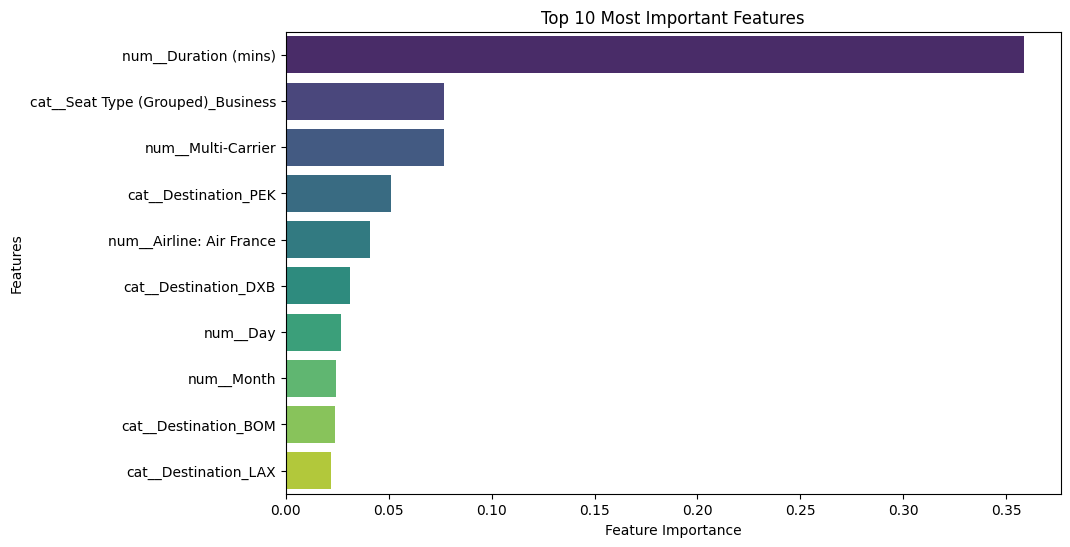

In [99]:
# Get feature importances from the Random Forest model
feature_names = preprocessor.get_feature_names_out()
importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="viridis")
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


## Observations from Feature Importance Analysis

The feature importance analysis of the Random Forest Regressor provides valuable insights into the factors that influence flight prices the most:

1. **Duration (mins)**:
   - The most influential feature, contributing significantly to the model's predictions.
   - Longer flight durations are likely associated with higher prices, especially for long-haul flights.

2. **Seat Type (Grouped)_Business**:
   - Business-class seat types are a critical factor, indicating the premium pricing associated with these options.

3. **Multi-Carrier**:
   - Flights involving multiple airlines tend to have a notable impact on prices, likely due to added operational complexities or combined premium services.

4. **Destination (e.g., PEK, DXB, BOM, LAX)**:
   - Certain destination airports are highly influential, reflecting differences in regional flight costs and demand patterns.

5. **Airline-Specific Features (e.g., Air France)**:
   - Individual airlines contribute significantly, as pricing strategies and service levels vary across carriers.

6. **Temporal Features (Day, Month)**:
   - The day of the month and the month itself moderately impact prices, likely reflecting demand trends, seasonal variations, and holiday periods.

### Key Takeaways:
- **Operational Factors** like flight duration, seat type, and carrier choice are dominant predictors of flight prices.
- **Destination-Specific Trends** indicate that flights to certain locations may be more expensive due to demand or limited competition.
- **Seasonality and Timing** play a role but are less influential compared to operational and categorical features.
- These findings align with real-world trends and suggest the model effectively captures key drivers of flight pricing.


## Gradient Boosting with XGBoost
To compare the performance of different algorithms, we will train an XGBoost Regressor. This model is highly effective for tabular data and can handle non-linear relationships well. We will evaluate its performance using the same metrics as before:
1. **MAE**
2. **RMSE**
3. **R² Score**

In [102]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [ 0.05, 0.1],
    'max_depth': [6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train_preprocessed, y_train)

# Save the best model
best_xgb_model = grid_search_xgb.best_estimator_
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

# Evaluate the best model
y_pred_train_xgb = best_xgb_model.predict(X_train_preprocessed)
y_pred_test_xgb = best_xgb_model.predict(X_test_preprocessed)

train_mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

train_r2_xgb = r2_score(y_train, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

# Print the evaluation metrics
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")
print(f"\nXGBoost Training Performance:")
print(f"MAE: {train_mae_xgb:.2f}, RMSE: {train_rmse_xgb:.2f}, R²: {train_r2_xgb:.2f}")

print(f"\nXGBoost Testing Performance:")
print(f"MAE: {test_mae_xgb:.2f}, RMSE: {test_rmse_xgb:.2f}, R²: {test_r2_xgb:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}

XGBoost Training Performance:
MAE: 20.41, RMSE: 34.82, R²: 0.99

XGBoost Testing Performance:
MAE: 31.51, RMSE: 72.90, R²: 0.93


## Adding Airport Coordinates for Carbon Emissions Calculation

To integrate the ecological aspect into our project, we need to estimate the carbon emissions for each flight. This requires calculating the distance between origin and destination airports. For this purpose, we will:
1. Use the **Haversine formula** to calculate distances between airports.
2. Use a predefined list of coordinates for the airports in the dataset.
3. Compute **carbon emissions** based on:
   - Distance (`distance * 0.115 kg CO2 per km`).
   - Additional emissions for each stop (`50 kg CO2 per stop`).
4. Add the calculated carbon emissions as a new feature to the dataset for model training.

This will allow us to incorporate the environmental impact of flights into our machine learning models.


In [107]:
from geopy.distance import geodesic

# Dictionary of airport coordinates (latitude, longitude)
airport_coordinates = {
    'LHR': (51.4700, -0.4543),  # London Heathrow, United Kingdom
    'JFK': (40.6413, -73.7781),  # John F. Kennedy International, New York, USA
    'HND': (35.5494, 139.7798),  # Tokyo Haneda, Japan
    'DXB': (25.2532, 55.3657),  # Dubai International, United Arab Emirates
    'SIN': (1.3644, 103.9915),  # Singapore Changi, Singapore
    'SYD': (-33.9399, 151.1753),  # Sydney Kingsford Smith, Australia
    'GRU': (-23.4356, -46.4731),  # São Paulo-Guarulhos, Brazil
    'PEK': (40.0799, 116.6031),  # Beijing Capital International, China
    'JNB': (-26.1338, 28.2420),  # O.R. Tambo International, Johannesburg, South Africa
    'LAX': (33.9416, -118.4085),  # Los Angeles International, USA
    'FRA': (50.0379, 8.5622),  # Frankfurt am Main Airport, Germany
    'AMS': (52.3105, 4.7683),  # Amsterdam Airport Schiphol, Netherlands
    'MAD': (40.4722, -3.5638),  # Adolfo Suárez Madrid–Barajas, Spain
    'FCO': (41.7999, 12.2462),  # Leonardo da Vinci–Fiumicino Airport, Rome, Italy
    'IST': (41.2753, 28.7519),  # Istanbul Airport, Turkey
    'MEX': (19.4361, -99.0719),  # Mexico City International Airport, Mexico
    'YYZ': (43.6777, -79.6248),  # Toronto Pearson International Airport, Canada
    'BOM': (19.0896, 72.8656),  # Chhatrapati Shivaji Maharaj International Airport, Mumbai, India
    'ICN': (37.4602, 126.4407),  # Incheon International Airport, Seoul, South Korea
    'BKK': (13.6900, 100.7501),  # Suvarnabhumi Airport, Bangkok, Thailand
}

airport_coordinates.update({
    'CDG': (49.0097, 2.5479),   # Paris Charles de Gaulle
    'ORY': (48.7231, 2.3798),   # Paris Orly
})
# Function to calculate distance between origin and destination
def calculate_distance(origin, destination):
    if origin in airport_coordinates and destination in airport_coordinates:
        return geodesic(airport_coordinates[origin], airport_coordinates[destination]).kilometers
    return 0  # Default to 0 if coordinates are missing


In [108]:
# Calculate distances for each flight
cleaned_data['Distance (km)'] = cleaned_data.apply(
    lambda x: calculate_distance(x['Origin'], x['Destination']), axis=1
)

# Function to calculate carbon emissions
def calculate_emissions(row):
    base_emissions = row['Distance (km)'] * 0.115  # kg CO2 per km
    stop_penalty = row['Stops'] * 50  # kg CO2 per stop
    return base_emissions + stop_penalty

# Add carbon emissions as a new feature
cleaned_data['Carbon Emissions (kg CO2)'] = cleaned_data.apply(calculate_emissions, axis=1)


In [109]:
# Preview the updated dataset
cleaned_data[['Origin', 'Destination', 'Distance (km)', 'Stops', 'Carbon Emissions (kg CO2)']].head(10)

,Origin,Destination,Distance (km),Stops,Carbon Emissions (kg CO2)
0,CDG,LHR,347.448047,0.0,39.956525
1,CDG,LHR,347.448047,0.0,39.956525
2,CDG,LHR,347.448047,0.0,39.956525
3,CDG,LHR,347.448047,0.0,39.956525
4,CDG,LHR,347.448047,0.0,39.956525
5,CDG,LHR,347.448047,0.0,39.956525
6,CDG,LHR,347.448047,0.0,39.956525
7,CDG,LHR,347.448047,0.0,39.956525
8,CDG,LHR,347.448047,1.0,89.956525
9,CDG,LHR,347.448047,1.0,89.956525


## Calculating Carbon Emissions for Flights

To quantify the environmental impact of each flight, we calculated **carbon emissions** based on the distance between the origin and destination airports and the number of stops. Here's how the calculation works:

### Steps Involved:

1. **Mapping Airport Coordinates**:
   - We created a dictionary, `airport_coordinates`, containing the latitude and longitude of major airports around the world. This allows us to calculate the distance between any two airports.

2. **Calculating Distance**:
   - Using the `geodesic` function from the `geopy` library, the distance between the origin and destination airports is calculated in kilometers:
     \[
     \text{Distance (km)} = \text{geodesic}(\text{origin coordinates}, \text{destination coordinates}).\text{kilometers}
     \]
   - If the coordinates for an airport are not found, the distance defaults to `0`.

3. **Base Emissions**:
   - The base carbon emissions are calculated based on the distance using the formula:
     \[
     \text{Base Emissions (kg CO2)} = \text{Distance (km)} \times 0.115
     \]
     Here, `0.115 kg CO2/km` is the emissions factor per kilometer for a flight.

4. **Stop Penalty**:
   - To account for additional emissions caused by takeoffs and landings, we added a penalty for each stop:
     \[
     \text{Stop Penalty (kg CO2)} = \text{Number of Stops} \times 50
     \]
   - Each stop adds a fixed penalty of `50 kg CO2`.

5. **Total Emissions**:
   - The total carbon emissions for each flight are calculated by summing the base emissions and the stop penalty:
     \[
     \text{Carbon Emissions (kg CO2)} = \text{Base Emissions} + \text{Stop Penalty}
     \]

### Implementation in Code:

- The **distance** is calculated for each flight using the `calculate_distance` function, which looks up the coordinates of the origin and destination airports.
- The **carbon emissions** are then calculated for each flight using the `calculate_emissions` function, which combines the base emissions and stop penalties.

Finally, the calculated values are added to the dataset as new features:
- `Distance (km)`
- `Carbon Emissions (kg CO2)`

This approach ensures that both the environmental impact and flight logistics (e.g., number of stops) are considered in our analysis.


## Incorporating Ecological Features into Price Prediction

To address the ecological aspect, we include **carbon emissions** as a feature in the training dataset. The carbon emissions are calculated based on:
1. **Distance between the origin and destination airports.**
2. **Number of stops**, which increases emissions due to additional takeoffs and landings.

The updated model predicts the price while implicitly considering ecological impact, providing users with insights into the trade-offs between flight cost and environmental impact.


## Training an XGBoost Model with Ecological Features

To incorporate the ecological dimension, the **Carbon Emissions (kg CO2)** feature has been added to the dataset. This feature accounts for:
1. **Distance between the origin and destination airports.**
2. **Number of stops**, as additional stops increase emissions.

We will fine-tune the XGBoost model using a grid search to identify the best hyperparameters. The grid search will evaluate combinations of:
- Number of estimators.
- Learning rate.
- Maximum tree depth.
- Subsample ratio.
- Column sampling by tree.

The goal is to create a model that accurately predicts flight prices while implicitly incorporating ecological aspects.


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import numpy as np

# Define updated features and target variable
features_with_emissions = [col for col in features] + ['Carbon Emissions (kg CO2)']
X_emissions = cleaned_data[features_with_emissions]
y_emissions = cleaned_data['Price']

# Split the updated dataset
X_train_emissions, X_test_emissions, y_train_emissions, y_test_emissions = train_test_split(
    X_emissions, y_emissions, test_size=0.2, random_state=42
)

# Split columns into numerical and categorical
categorical_columns = ['Seat Type (Grouped)', 'Origin', 'Destination']
numerical_columns = [col for col in features_with_emissions if col not in categorical_columns]

# Create an updated preprocessing pipeline
preprocessor_with_emissions = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Apply preprocessing to the training and testing data
X_train_emissions_preprocessed = preprocessor_with_emissions.fit_transform(X_train_emissions)
X_test_emissions_preprocessed = preprocessor_with_emissions.transform(X_test_emissions)

print(f"Preprocessed Training Data Shape: {X_train_emissions_preprocessed.shape}")
print(f"Preprocessed Testing Data Shape: {X_test_emissions_preprocessed.shape}")



Preprocessed Training Data Shape: (29400, 215)
Preprocessed Testing Data Shape: (7350, 215)


In [117]:
X_train_emissions.head()

,Airline: Aircalin,Airline: Sun Country Air,Airline: Airlink,Airline: Royal Air Maroc,Airline: Aircompany Armenia,Airline: KM Malta Airlines,Airline: XiamenAir,Airline: SriLankan Airlines,Airline: FLYONE,Airline: ANA,...,Stops,Duration (mins),Seat Type (Grouped),Origin,Destination,Day,Month,Weekday,Multi-Carrier,Carbon Emissions (kg CO2)
19057,0,0,0,0,0,0,0,0,0,0,...,0.0,220,Economy,ORY,IST,10,3,0,0,255.757998
30751,0,0,0,0,0,0,0,0,0,0,...,0.0,80,Other,CDG,LHR,3,4,3,0,39.956525
1664,0,0,0,0,0,0,0,0,0,0,...,1.0,405,Economy,ORY,FCO,3,2,0,1,175.343330
30401,0,0,0,0,0,0,0,0,0,0,...,1.0,1105,Economy,CDG,MEX,2,4,2,1,1109.494566
28109,0,0,0,0,0,0,0,0,0,0,...,1.0,765,Economy,CDG,BOM,29,3,5,0,855.156268


## Custom EcoScore Metric for XGBoost

To ensure the model takes both price and carbon emissions into account during training, we define a custom **EcoScore** metric. This metric balances the absolute error in price prediction with the carbon emissions.

The EcoScore is defined as:

$$
\text{EcoScore} = \alpha \cdot \text{Price Error} + \beta \cdot \text{Carbon Emissions}
$$

Where:
- $ \alpha $: Weight for price error (default: 1.0).
- $ \beta $: Weight for carbon emissions (default: 0.1).

By incorporating this metric into training, the model learns to prioritize flights with both lower prices and lower carbon emissions.


In [118]:
def custom_ecoscore(y_true, y_pred):
    """
    Custom evaluation metric for EcoScore, combining price prediction error
    with carbon emissions.
    
    Args:
    - y_true: True target values (includes price and emissions).
    - y_pred: Predicted price values.
    
    Returns:
    - EcoScore metric as a tuple (name, value).
    """
    alpha = 1.0  # Weight for price error
    beta = 0.3   # Weight for emissions

    # Extract price and emissions
    price_error = np.abs(y_true['Price'] - y_pred)
    emissions = y_true['Carbon Emissions (kg CO2)']
    
    # Calculate EcoScore
    ecoscore = alpha * price_error + beta * emissions
    return "EcoScore", np.mean(ecoscore)


In [121]:
# Combine price and emissions into a single target variable
y_emissions_combined = pd.DataFrame({
    'Price': y_emissions,
    'Carbon Emissions (kg CO2)': X_emissions['Carbon Emissions (kg CO2)']
})

def ecoscore_scorer(y_true, y_pred):
    """
    Custom evaluation metric for EcoScore during GridSearchCV.
    Combines price prediction error with carbon emissions.
    
    Args:
    - y_true: True target values (structured as [Price, Emissions]).
    - y_pred: Predicted price values.
    
    Returns:
    - EcoScore: Weighted metric combining price error and emissions.
    """
    alpha = 1.0  # Weight for price
    beta = 0.3   # Weight for emissions

    # Separate price and emissions from y_true
    price_true = y_true[:, 0]
    emissions_true = y_true[:, 1]
    
    # Calculate price error
    price_error = np.abs(price_true - y_pred)
    
    # Calculate EcoScore
    ecoscore = alpha * price_error + beta * emissions_true
    return -np.mean(ecoscore)  # Negative because we want to minimize EcoScore


In [123]:
print(f"X_train_emissions shape: {X_train_emissions.shape}")
print(f"X_train_emissions_preprocessed shape: {X_train_emissions_preprocessed.shape}")
print(f"y_emissions_combined shape: {y_emissions_combined.shape}")


X_train_emissions shape: (29400, 192)
X_train_emissions_preprocessed shape: (29400, 215)
y_emissions_combined shape: (36750, 2)


In [124]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import numpy as np

# Define updated features and target variable
features_with_emissions = [col for col in features] + ['Carbon Emissions (kg CO2)']
X_emissions = cleaned_data[features_with_emissions]
y_emissions_combined = cleaned_data[['Price', 'Carbon Emissions (kg CO2)']]

# Split the dataset consistently
X_train_emissions, X_test_emissions, y_train_emissions_combined, y_test_emissions_combined = train_test_split(
    X_emissions, y_emissions_combined, test_size=0.2, random_state=42
)

# Split columns into numerical and categorical
categorical_columns = ['Seat Type (Grouped)', 'Origin', 'Destination']
numerical_columns = [col for col in features_with_emissions if col not in categorical_columns]

# Create an updated preprocessing pipeline
preprocessor_with_emissions = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)
# Save the preprocessor

# Apply preprocessing to the training and testing data
X_train_emissions_preprocessed = preprocessor_with_emissions.fit_transform(X_train_emissions)
X_test_emissions_preprocessed = preprocessor_with_emissions.transform(X_test_emissions)

print(f"Preprocessed Training Data Shape: {X_train_emissions_preprocessed.shape}")
print(f"Preprocessed Testing Data Shape: {X_test_emissions_preprocessed.shape}")

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}




Preprocessed Training Data Shape: (29400, 215)
Preprocessed Testing Data Shape: (7350, 215)


In [180]:
joblib.dump(preprocessor_with_emissions, 'eco_preprocessor.pkl')

['eco_preprocessor.pkl']

In [142]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import numpy as np
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Define the custom scorer for GridSearchCV
def ecoscore_scorer(y_true, y_pred):
    alpha = 1.0  # Weight for price
    beta = 0.3   # Weight for emissions

    # Separate price and emissions from y_true
    price_true = y_true[:, 0]
    emissions_true = y_true[:, 1]
    
    # Calculate price error
    price_error = np.abs(price_true - y_pred)
    
    # Calculate EcoScore
    ecoscore = alpha * price_error + beta * emissions_true
    return -np.mean(ecoscore)  # Negative because we want to minimize EcoScore

custom_scorer = make_scorer(ecoscore_scorer, greater_is_better=False)

# Perform GridSearchCV with the custom scorer
xgb_model = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring=custom_scorer,
    verbose=2,
    n_jobs=-1
)

# Fit the model using the combined target for training
grid_search_xgb.fit(X_train_emissions_preprocessed, y_train_emissions_combined.values)

# Save the best model
best_xgb_model = grid_search_xgb.best_estimator_
joblib.dump(best_xgb_model, 'best_xgb_model_with_emissions.pkl')

# Predict using the best model
y_pred_train_xgb = best_xgb_model.predict(X_train_emissions_preprocessed)
y_pred_test_xgb = best_xgb_model.predict(X_test_emissions_preprocessed)

# Evaluate predictions against the combined target (both Price and Emissions)
train_mae_xgb = mean_absolute_error(y_train_emissions_combined.values, y_pred_train_xgb)
test_mae_xgb = mean_absolute_error(y_test_emissions_combined.values, y_pred_test_xgb)

train_rmse_xgb = np.sqrt(mean_squared_error(y_train_emissions_combined.values, y_pred_train_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_emissions_combined.values, y_pred_test_xgb))

train_r2_xgb = r2_score(y_train_emissions_combined.values, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test_emissions_combined.values, y_pred_test_xgb)

# Print evaluation metrics
print(f"\nXGBoost with EcoScore - Training Performance:")
print(f"MAE: {train_mae_xgb:.2f}, RMSE: {train_rmse_xgb:.2f}, R²: {train_r2_xgb:.2f}")
print(f"\nXGBoost with EcoScore - Testing Performance:")
print(f"MAE: {test_mae_xgb:.2f}, RMSE: {test_rmse_xgb:.2f}, R²: {test_r2_xgb:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



XGBoost with EcoScore - Training Performance:
MAE: 26.92, RMSE: 73.32, R²: 0.94

XGBoost with EcoScore - Testing Performance:
MAE: 27.16, RMSE: 75.53, R²: 0.93


# Transition to Streamlit Application Development

With both models trained and evaluated, we are ready to proceed with the development of a **Streamlit application**. The app will feature:

1. **Two Interfaces**:
   - **Classic Prediction**: Uses the price-only model to predict flight prices.
   - **Eco-Friendly Prediction**: Uses the EcoScore model to predict flight prices, factoring in carbon emissions.

2. **User-Friendly Inputs**:
   - Reduce complexity by deriving necessary features (e.g., one-hot-encoded columns) based on minimal user input.
   - Inputs such as origin, destination, stops, duration, and seat type will be collected.

3. **Output Features**:
   - Predicted flight price.
   - For the Eco-Friendly Prediction, display additional outputs:
     - **EcoScore**: A weighted combination of price and carbon emissions.
     - **Carbon Emissions**: Estimated emissions for the selected flight.

